In [122]:
%matplotlib inline

In [123]:
# Import Dependencies
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress




In [124]:
# Read CSV File
csv_path = "Resources/Premier League Player Stats.csv"
csv_path

'Resources/Premier League Player Stats.csv'

In [125]:
# Create a DataFrame
player_stats_df = pd.read_csv(csv_path)
player_stats_df.head()

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59


In [126]:
# number of Players
player_stats_count = len(player_stats_df["PLAYER"].unique())
player_stats_count

540

In [127]:
# Top Performing Team
player_stats_df = player_stats_df.sort_values("TEAM")
player_stats_df

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
202,203,Reiss Nelson,Arsenal,17,7,627,1,0,6,4
166,167,Eddie Nketiah,Arsenal,13,7,633,2,0,13,5
433,434,Rob Holding,Arsenal,8,6,581,0,0,2,0
330,331,Dani Ceballos,Arsenal,24,18,1699,0,2,8,3
453,454,Shkodran Mustafi,Arsenal,15,13,1205,0,1,9,4
...,...,...,...,...,...,...,...,...,...,...
328,329,Willy Boly,Wolverhampton Wanderers,22,22,1979,0,1,3,3
38,39,Diogo José Teixeira da Silva,Wolverhampton Wanderers,34,27,2297,7,1,46,26
491,492,Bruno André Cavaco Jordão,Wolverhampton Wanderers,1,0,6,0,0,0,0
7,8,Raúl Alonso Jiménez Rodríguez,Wolverhampton Wanderers,38,37,3244,17,6,89,44


In [128]:
player_stats_df = player_stats_df.sort_values("Rank")
player_stats_df

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59
...,...,...,...,...,...,...,...,...,...,...
535,536,Dennis Cirkin,Tottenham Hotspur,0,0,0,0,0,0,0
536,537,Darnell Johnson,Leicester City,0,0,0,0,0,0,0
537,538,Timothy Fosu-Mensah,Manchester United,3,2,136,0,0,1,0
538,539,Conor Coventry,West Ham United,0,0,0,0,0,0,0


In [129]:
# Find goals per min 
goals_permin = player_stats_df["G"]/player_stats_df["MIN"]
goals_permin



0      0.007581
1      0.007824
2      0.007011
3      0.007519
4      0.006588
         ...   
535         NaN
536         NaN
537    0.000000
538         NaN
539         NaN
Length: 540, dtype: float64

In [130]:
# Create a new column
player_stats_df["GOALS PERMIN"]= goals_permin
player_stats_df.head()

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,GOALS PERMIN
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43,0.007581
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38,0.007824
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42,0.007011
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38,0.007519
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59,0.006588


In [131]:
top_players = player_stats_df[player_stats_df["Rank"] <= 50]
top_players.head()


,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,GOALS PERMIN
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43,0.007581
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38,0.007824
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42,0.007011
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38,0.007519
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59,0.006588


The r-squared is: 0.19847294310569105


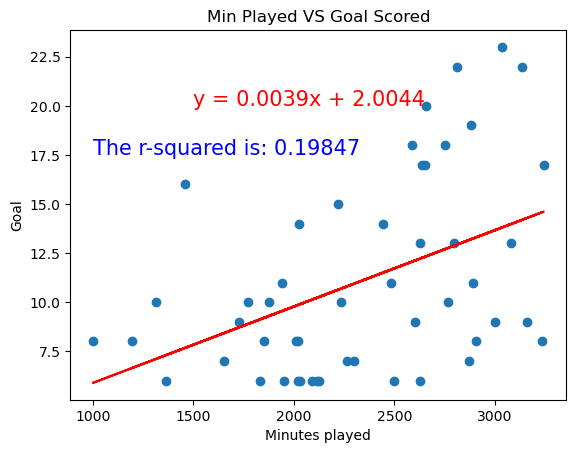

In [160]:
#Scatter plot to shwo minutes played vs Goal Scored.
plt.scatter(top_players["MIN"],top_players["G"])
plt.xlabel("Minutes played")
plt.ylabel("Goal")
(slope, intercept, rvalue, pvalue, stderr) = linregress(top_players["MIN"], top_players["G"])
regress_values = top_players["MIN"] * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(top_players["MIN"],regress_values,"r-")
plt.annotate(line_eq,(1500,20),fontsize=15,color="red")
plt.annotate(f"The r-squared is: {round(rvalue**2,5)}",(1000,17.5),fontsize=15,color="blue")
plt.show
#x_values = san_diego_housing['AveRooms']
#y_values = san_diego_housing['MEDV']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($100,000)')
print(f"The r-squared is: {rvalue**2}")
plt.title("Min Played VS Goal Scored")
plt.savefig("Images/lineConfig.png")
plt.show()

In [154]:
st.ttest_1samp(top_players["G"], player_stats_df["G"].mean())

TtestResult(statistic=13.191676278304028, pvalue=9.582897372644606e-18, df=49)

In [162]:
st.ttest_1samp(top_players["ASST"], player_stats_df["ASST"].mean())

TtestResult(statistic=5.6167794706761445, pvalue=9.062009171815211e-07, df=49)

The r-squared is: 0.8912615540543076


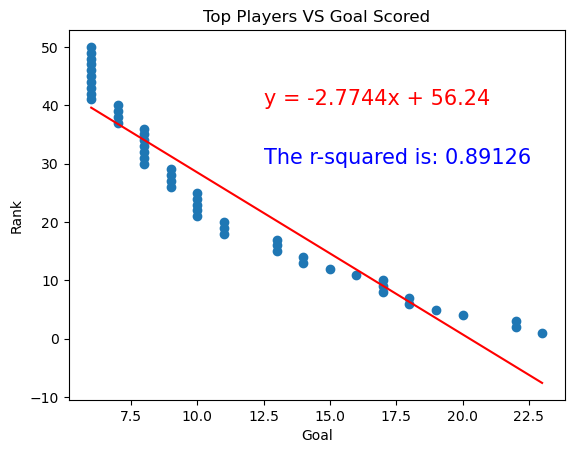

In [170]:
#Find better corelation between top players vs Goal Scored
plt.scatter(top_players["G"],top_players["Rank"])
plt.xlabel("Goal")
plt.ylabel("Rank")
(slope, intercept, rvalue, pvalue, stderr) = linregress(top_players["G"], top_players["Rank"])
regress_values = top_players["G"] * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(top_players["G"],regress_values,"r-")
plt.annotate(line_eq,(12.5,40),fontsize=15,color="red")
plt.annotate(f"The r-squared is: {round(rvalue**2,5)}",(12.5,30),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")
plt.title("Top Players VS Goal Scored")
plt.savefig("Images/lineConfig2.png")
plt.show()

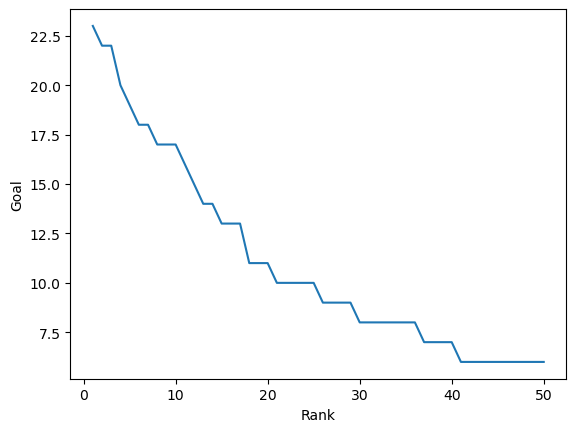

In [165]:
#Line Graph for top players vs goal scored
plt.plot(top_players["Rank"],top_players["G"])
plt.xlabel("Rank")
plt.ylabel("Goal")
plt.savefig("Images/lineConfig3.png")
plt.show()



In [135]:
# Find Goal% 
player_stats_df["GOAL%"] = player_stats_df["G"]/player_stats_df["SHOTS"]*100
player_stats_df.head()

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,GOALS PERMIN,GOAL%
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43,0.007581,32.394366
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38,0.007824,33.333333
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42,0.007011,31.428571
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38,0.007519,29.411765
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59,0.006588,20.000000


In [136]:
# Remove NANS
player_stats_df.fillna(0,inplace=True)
player_stats_df

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,GOALS PERMIN,GOAL%
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43,0.007581,32.394366
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38,0.007824,33.333333
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42,0.007011,31.428571
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38,0.007519,29.411765
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59,0.006588,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
535,536,Dennis Cirkin,Tottenham Hotspur,0,0,0,0,0,0,0,0.000000,0.000000
536,537,Darnell Johnson,Leicester City,0,0,0,0,0,0,0,0.000000,0.000000
537,538,Timothy Fosu-Mensah,Manchester United,3,2,136,0,0,1,0,0.000000,0.000000
538,539,Conor Coventry,West Ham United,0,0,0,0,0,0,0,0.000000,0.000000


In [137]:
# Find highest score with shots accuracy
player_stats_df = player_stats_df.sort_values("GOAL%", ascending= False)
player_stats_df.head(10)



,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,GOALS PERMIN,GOAL%
239,240,DeAndre Yedlin,Newcastle United,16,10,936,1,0,1,1,0.001068,100.000000
163,164,Matthew Longstaff,Newcastle United,9,6,572,2,0,3,2,0.003497,66.666667
165,166,Florian Lejeune,Newcastle United,6,4,441,2,0,4,3,0.004535,50.000000
113,114,Steven Bergwijn,Tottenham Hotspur,14,8,702,3,1,6,4,0.004274,50.000000
174,175,Xherdan Shaqiri,Liverpool,7,2,182,1,0,2,1,0.005495,50.000000
78,79,Jorge Luiz Frello Filho,Chelsea,31,27,2384,4,2,8,4,0.001678,50.000000
88,89,Bernard Anício Caldeira Duarte,Everton,27,15,1278,3,2,7,5,0.002347,42.857143
94,95,Michael Obafemi,Southampton,21,8,661,3,2,7,5,0.004539,42.857143
144,145,Sokratis Papastathopoulos,Arsenal,19,19,1697,2,0,5,2,0.001179,40.000000
148,149,Ciaran Clark,Newcastle United,14,14,1188,2,0,5,4,0.001684,40.000000


In [138]:

# Find Shot Accuracy % 
player_stats_df["Shot Accuracy%"] = player_stats_df["SOG"]/player_stats_df["SHOTS"]*100
player_stats_df.head(10)

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,GOALS PERMIN,GOAL%,Shot Accuracy%
239,240,DeAndre Yedlin,Newcastle United,16,10,936,1,0,1,1,0.001068,100.000000,100.000000
163,164,Matthew Longstaff,Newcastle United,9,6,572,2,0,3,2,0.003497,66.666667,66.666667
165,166,Florian Lejeune,Newcastle United,6,4,441,2,0,4,3,0.004535,50.000000,75.000000
113,114,Steven Bergwijn,Tottenham Hotspur,14,8,702,3,1,6,4,0.004274,50.000000,66.666667
174,175,Xherdan Shaqiri,Liverpool,7,2,182,1,0,2,1,0.005495,50.000000,50.000000
78,79,Jorge Luiz Frello Filho,Chelsea,31,27,2384,4,2,8,4,0.001678,50.000000,50.000000
88,89,Bernard Anício Caldeira Duarte,Everton,27,15,1278,3,2,7,5,0.002347,42.857143,71.428571
94,95,Michael Obafemi,Southampton,21,8,661,3,2,7,5,0.004539,42.857143,71.428571
144,145,Sokratis Papastathopoulos,Arsenal,19,19,1697,2,0,5,2,0.001179,40.000000,40.000000
148,149,Ciaran Clark,Newcastle United,14,14,1188,2,0,5,4,0.001684,40.000000,80.000000


In [139]:
# 
player_stats_df = player_stats_df.sort_values("Shot Accuracy%", ascending= False)
player_stats_df.head()


,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,GOALS PERMIN,GOAL%,Shot Accuracy%
239,240,DeAndre Yedlin,Newcastle United,16,10,936,1,0,1,1,0.001068,100.0,100.0
461,462,Nathan Holland,West Ham United,2,0,31,0,0,1,1,0.000000,0.0,100.0
328,329,Willy Boly,Wolverhampton Wanderers,22,22,1979,0,1,3,3,0.000000,0.0,100.0
386,387,Domingos Quina,Watford,4,0,18,0,0,1,1,0.000000,0.0,100.0
377,378,Isaac Success Ajayi,Watford,5,0,65,0,0,1,1,0.000000,0.0,100.0


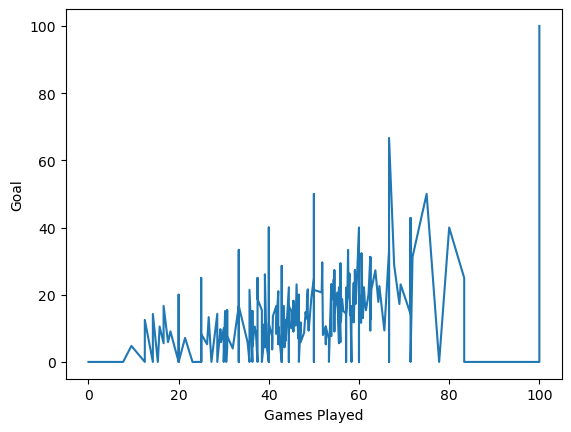

In [148]:
# plt.plot(player_stats_df["Shot Accuracy%"],player_stats_df["GOAL%"])
# plt.xlabel("Games Played")
# plt.ylabel("Goal")


# plt.show()


In [140]:
# Groupby to find mean
team_goals = player_stats_df["GOAL%"].groupby(player_stats_df["TEAM"]).mean()
team_sog = player_stats_df["Shot Accuracy%"].groupby(player_stats_df["TEAM"]).mean()
team_total_goals = player_stats_df["G"].groupby(player_stats_df["TEAM"]).sum()
#team_goals
#team_sog
team_total_goals


TEAM
Arsenal                      56
Aston Villa                  40
Bournemouth                  37
Brighton and Hove Albion     32
Burnley                      39
Chelsea                      69
Crystal Palace               27
Everton                      43
Leicester City               65
Liverpool                    83
Manchester City             100
Manchester United            65
Newcastle United             36
Norwich City                 24
Sheffield United             35
Southampton                  51
Tottenham Hotspur            54
Watford                      35
West Ham United              48
Wolverhampton Wanderers      47
Name: G, dtype: int64

In [141]:
# Create DataFrame for Goal % and SOG%
team_goals_df = pd.DataFrame(team_goals)
team_goals_df["SOG%"]= team_sog
team_goals_df["Total Goals"] = team_total_goals
team_goals_df.head()

,GOAL%,SOG%,Total Goals
TEAM,,,
Arsenal,10.161982,43.431215,56
Aston Villa,7.619561,34.866026,40
Bournemouth,8.154427,41.293437,37
Brighton and Hove Albion,6.162119,37.090661,32
Burnley,5.310104,32.540584,39


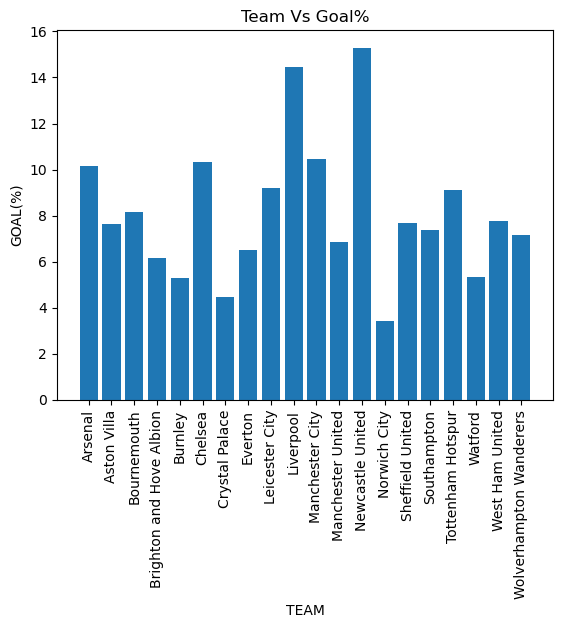

In [166]:
# Create a bar graph 

#team_goals_df.plot(kind="bar")
plt.bar(team_goals_df.index.values,team_goals_df["GOAL%"])
plt.xticks(rotation=90)
plt.xlabel("TEAM")
plt.ylabel("GOAL(%)")
plt.title("Team Vs Goal%")
plt.savefig("Images/barchart1.png")
plt.show()


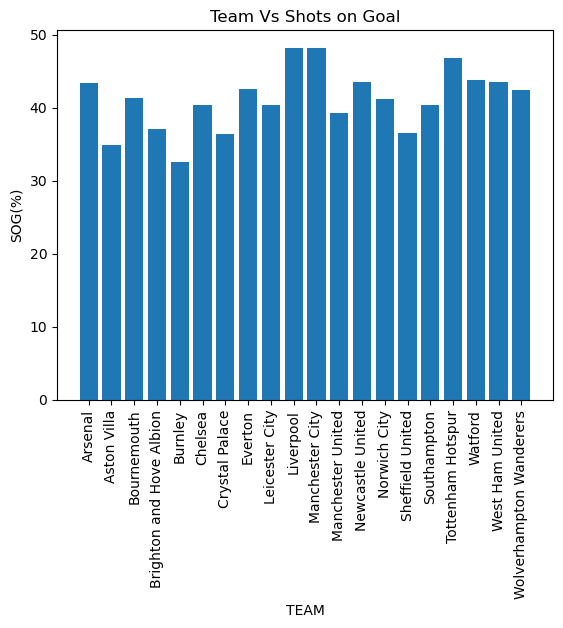

In [167]:
# Crate a bar graph for SOG%
plt.bar(team_goals_df.index.values,team_goals_df["SOG%"])
plt.xticks(rotation=90)
plt.xlabel("TEAM")
plt.ylabel("SOG(%)")
plt.title("Team Vs Shots on Goal")
plt.savefig("Images/barchart2.png")
plt.show()

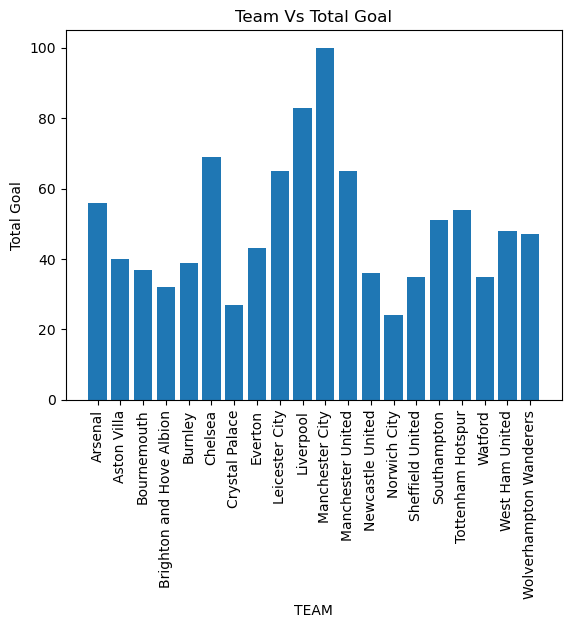

In [168]:
plt.bar(team_goals_df.index.values,team_goals_df["Total Goals"])
plt.xticks(rotation=90)
plt.xlabel("TEAM")
plt.ylabel("Total Goal")
plt.title("Team Vs Total Goal")
plt.savefig("Images/barchart3.png")
plt.show()
